سامي إبراهيم العوفي | 3700086

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [11]:
import pandas as ps
import os

<h1>Dataset</h1>

In [18]:
dataset = pd.read_csv("C:\\Users\\sm1sm\\Downloads\\transfusion.data")
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


<h1>Dataset Info</h1>

In [20]:
pd.read_csv("C:\\Users\\sm1sm\\Downloads\\transfusion.data").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


- The Dataset does not have any missing values

<h1>The balance of the Dataset</h1>

In [32]:
print(dataset.shape)
print(dataset["Recency (months)"].count())
print(dataset["Frequency (times)"].count())
print(dataset["Monetary (c.c. blood)"].count())
print(dataset["Time (months)"].count())
print(dataset["whether he/she donated blood in March 2007"].count())


(748, 5)
748
748
748
748
748


In [33]:
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<h1> Data Visualization  </h1>

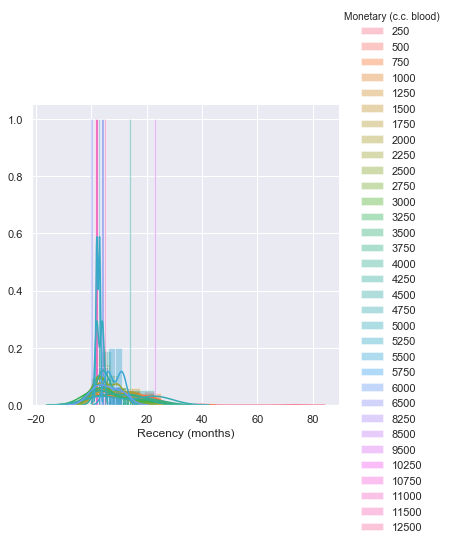

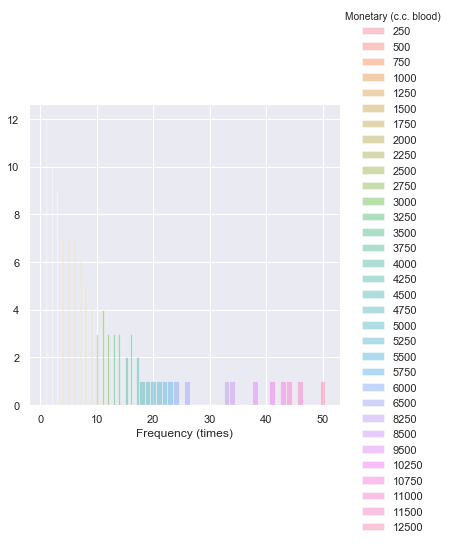

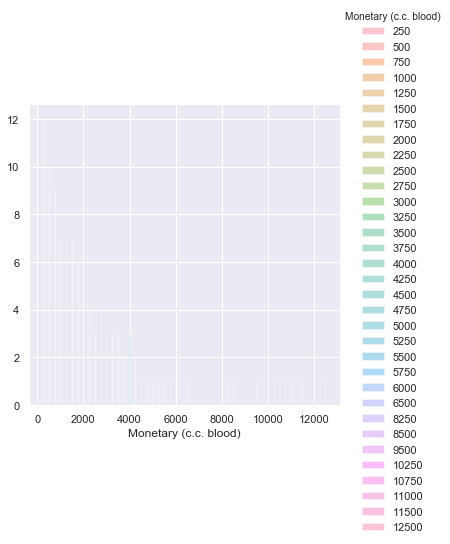

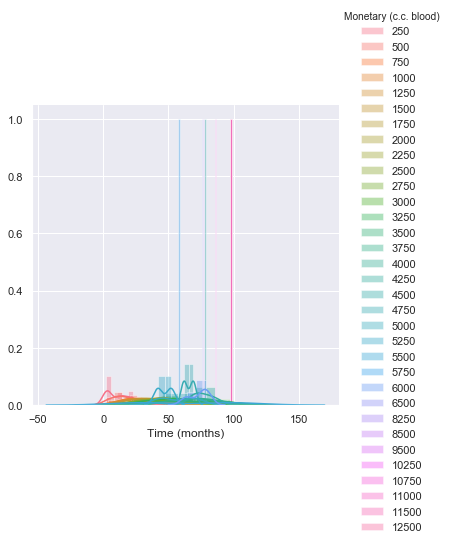

In [37]:
for ojha, feature in enumerate(list(dataset.columns)[:-1]):
    fg = sns.FacetGrid(dataset, hue='Monetary (c.c. blood)', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

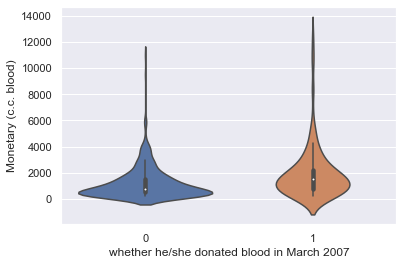

In [45]:
sns.violinplot(x='whether he/she donated blood in March 2007', y='Monetary (c.c. blood)', data=dataset)
plt.show()

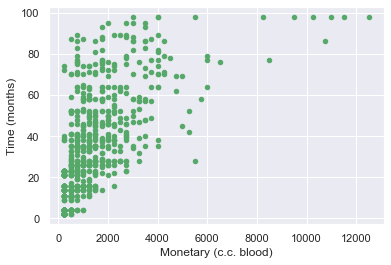

In [48]:
dataset.plot(kind='scatter', x='Monetary (c.c. blood)', y='Time (months)',c='g')
plt.show()

<h1>Null data or missing values</h1>

In [52]:
dataset.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [58]:
modData = dataset.append({'Recency (months)' : np.nan , 'Frequency (times)' : 3.6, 'Monetary (c.c. blood)': 0,
                       'Time (months)': 0.2, 'whether he/she donated blood in March 2007': '0' } , ignore_index=True)
modData.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,748.000000,749.000000,749.000000,749.000000
mean,9.506684,5.512150,1376.835781,34.236582
std,8.095396,5.835822,1459.720141,24.392225
min,0.000000,1.000000,0.000000,0.200000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [60]:
modData[['Recency (months)',
         'Frequency (times)',
         'Monetary (c.c. blood)',
         'Time (months)','whether he/she donated blood in March 2007']] = modData[['Recency (months)',
                                              'Frequency (times)',
                                              'Monetary (c.c. blood)',
                                              'Time (months)',
                                              'whether he/she donated blood in March 2007']].replace(0, np.NaN)
print('Columns with missing values')
print(modData.isnull().sum())


Columns with missing values
Recency (months)                                6
Frequency (times)                               0
Monetary (c.c. blood)                           1
Time (months)                                   0
whether he/she donated blood in March 2007    570
dtype: int64


In [71]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 10

In [87]:
le = LabelEncoder()
le.fit(dataset['whether he/she donated blood in March 2007'].values)


y = le.transform(dataset['whether he/she donated blood in March 2007'].values)


X = dataset.drop('whether he/she donated blood in March 2007', axis=1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=seed)

<h1>Model accuracy</h1>

In [88]:
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.788235294117647


- The accuracy is 78%

<h1>Confusion Matrix</h1>

Confusion Matrix is
[[183  11]
 [ 43  18]]


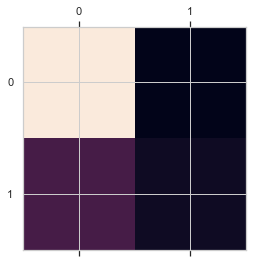

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=dataset['whether he/she donated blood in March 2007'].unique()))

              precision    recall  f1-score   support

           1       0.62      0.30      0.40        61
           0       0.81      0.94      0.87       194

    accuracy                           0.79       255
   macro avg       0.72      0.62      0.64       255
weighted avg       0.76      0.79      0.76       255



<h1>Decision Tree</h1>

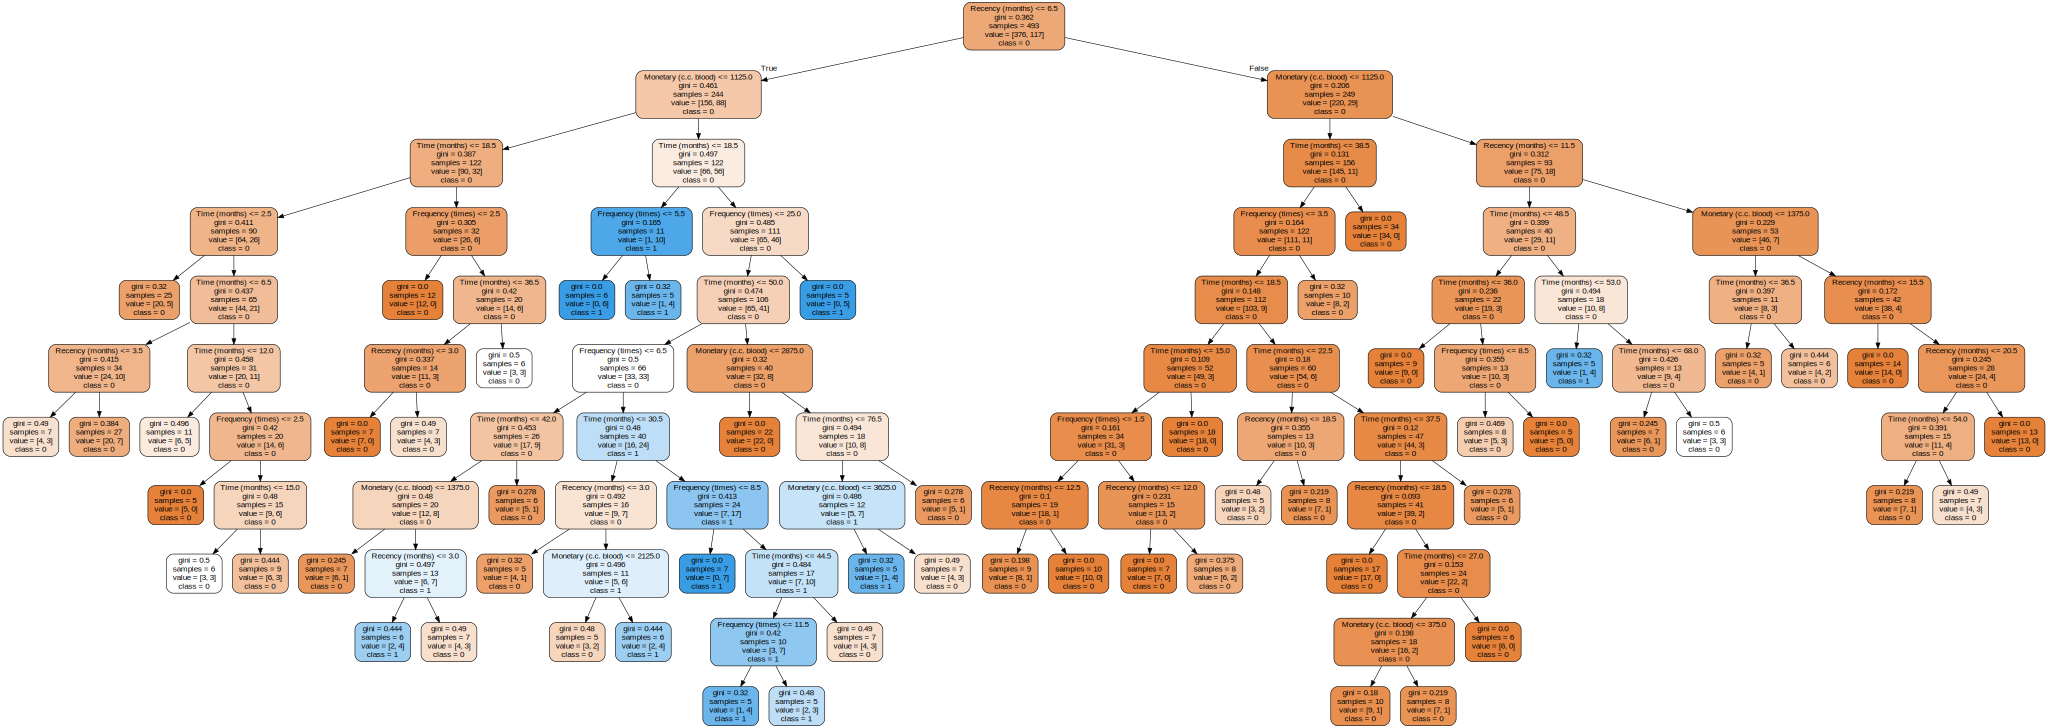

In [93]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['0','1']

    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)

    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, dataset, 'whether he/she donated blood in March 2007', le, 'Blood-Transfusion')
tree_graph

In [97]:
X= dataset['Frequency (times)']
Y= dataset['Monetary (c.c. blood)']
Slic_df = pd.DataFrame({'Frequency (times)': X, 'Monetary (c.c. blood': Y})
print(Slic_df)

     Frequency (times)  Monetary (c.c. blood
0                   50                 12500
1                   13                  3250
2                   16                  4000
3                   20                  5000
4                   24                  6000
..                 ...                   ...
743                  2                   500
744                  2                   500
745                  3                   750
746                  1                   250
747                  1                   250

[748 rows x 2 columns]
